In [1]:
import pandas as pd


In [3]:
from sklearn.metrics import adjusted_rand_score, confusion_matrix, normalized_mutual_info_score

# Assuming df_base and df_mine are already defined DataFrames
def generate_metrics_cluster(df_mine,df_base):
    # Initialize an empty DataFrame
    df = pd.DataFrame()

    # Lists to hold values
    annotation_id = []
    estimated_grade_base = []
    estimated_grade_mine = []

    # Identify common features between both DataFrames (excluding 'annotation id')
    common_features = ['estimated grade']

    # Create dictionaries to store values for both df_base and df_mine features
    feature_values_base = {feature: [] for feature in common_features}
    feature_values_mine = {feature: [] for feature in common_features}

    # Iterate through each row in df_mine
    for idx in range(len(df_mine)):
        # Add the annotation id from df_mine
        annotation_id.append(df_mine['annotation id'][idx])
    
        # Loop through each common feature and get the corresponding value from both DataFrames
        for feature in common_features:
            # Get the corresponding feature value from df_mine based on the current annotation id
            feature_values_mine[feature].append(df_mine[feature][idx])

            # Get the corresponding feature value from df_base using the same annotation id
            aux = df_base.loc[df_base['annotation id'] == df_mine['annotation id'][idx], feature]
        
            # Check if there is a match, append the value or a default None
            if not aux.empty:
                feature_values_base[feature].append(aux.values[0])  # Extract the first match if found
            else:
                feature_values_base[feature].append(None)  # Append None if no match is found

    # Create the DataFrame with the annotation id and common features
    df['annotation id'] = annotation_id

    # Add the features from `df_base` and `df_mine` with appropriate suffixes
    for feature in common_features:
        df[feature + ' base'] = feature_values_base[feature]  # Base features
        df[feature + ' mine'] = feature_values_mine[feature]  # Mine features

    # Passo 3: Calcular o Adjusted Rand Index (ARI)
    ari_score = adjusted_rand_score(df['estimated grade base'], df['estimated grade mine'])
    print(f"Adjusted Rand Index (ARI): {ari_score:.2f}")

    # Passo 4: Calcular o Normalized Mutual Information Score (NMI)
    nmi_score = normalized_mutual_info_score(df['estimated grade base'], df['estimated grade mine'])
    print(f"Normalized Mutual Information Score (NMI): {nmi_score:.2f}")



In [ ]:
import glob

# Get a list of all files matching the pattern
file_list = glob.glob('annotations-dpoc-llm_*_metrics.csv')

# Loop through each file and process it
for file in file_list:
    print(file.split('annotations-dpoc-llm_')[1].split('_metrics.csv')[0])
    df_mine = pd.read_csv(file)
    df_base = pd.read_csv('annotations-dpoc-medical_specialist_metrics.csv')
    generate_metrics_cluster(df_mine, df_base)

4_tf_idf_custom_shot
Adjusted Rand Index (ARI): 0.51
Normalized Mutual Information Score (NMI): 0.40
2_tf_idf_custom_shot
Adjusted Rand Index (ARI): 0.18
Normalized Mutual Information Score (NMI): 0.30
10_tf_idf_custom_shot
Adjusted Rand Index (ARI): 0.58
Normalized Mutual Information Score (NMI): 0.44
2_shot
Adjusted Rand Index (ARI): 0.26
Normalized Mutual Information Score (NMI): 0.25
3_tf_idf_custom_shot
Adjusted Rand Index (ARI): 0.50
Normalized Mutual Information Score (NMI): 0.41
2_tf_idf_shot
Adjusted Rand Index (ARI): 0.38
Normalized Mutual Information Score (NMI): 0.34
4_tf_idf_shot
Adjusted Rand Index (ARI): 0.44
Normalized Mutual Information Score (NMI): 0.36
3_tf_idf_shot
Adjusted Rand Index (ARI): 0.17
Normalized Mutual Information Score (NMI): 0.24
1_shot
Adjusted Rand Index (ARI): 0.31
Normalized Mutual Information Score (NMI): 0.39
1_tf_idf_shot
Adjusted Rand Index (ARI): 0.32
Normalized Mutual Information Score (NMI): 0.30
10_tf_idf_shot
Adjusted Rand Index (ARI): 0.4

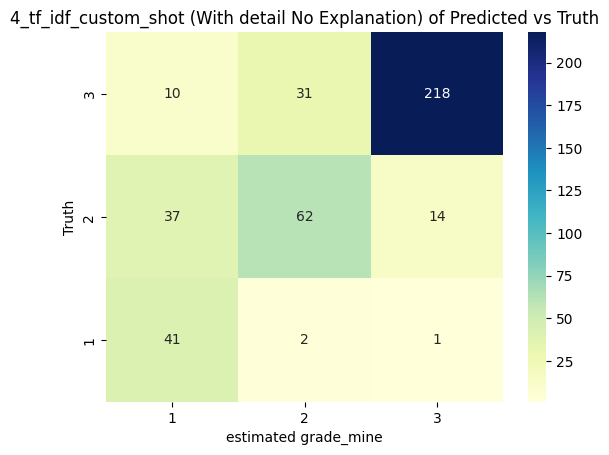

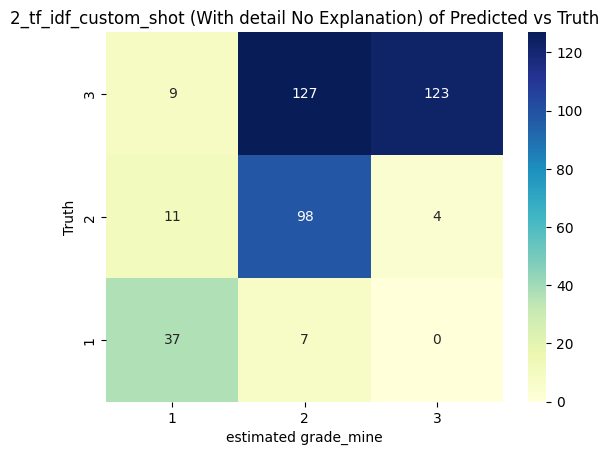

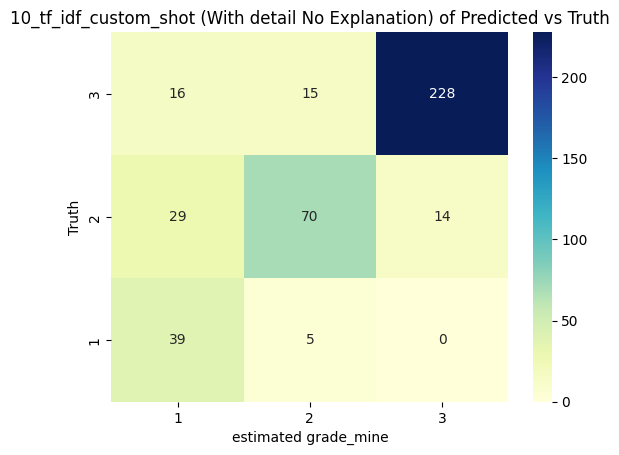

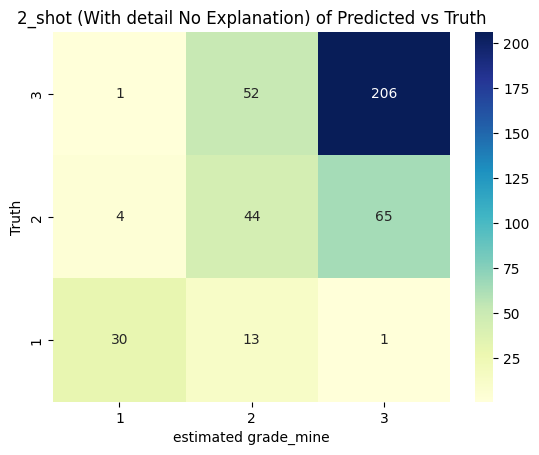

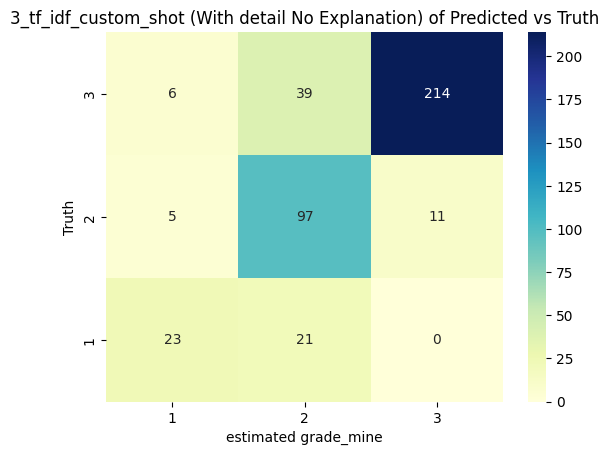

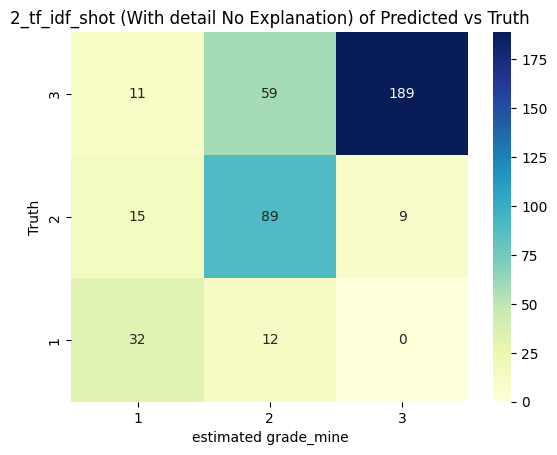

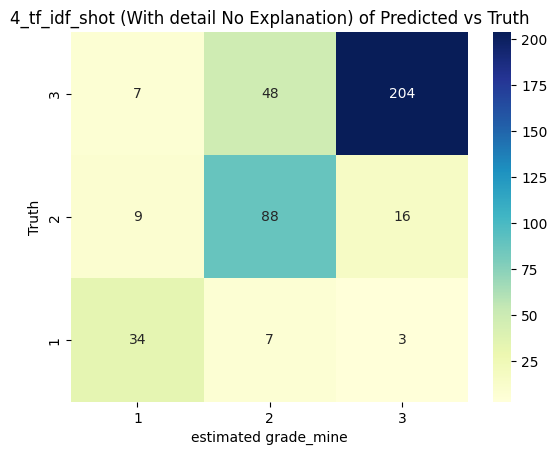

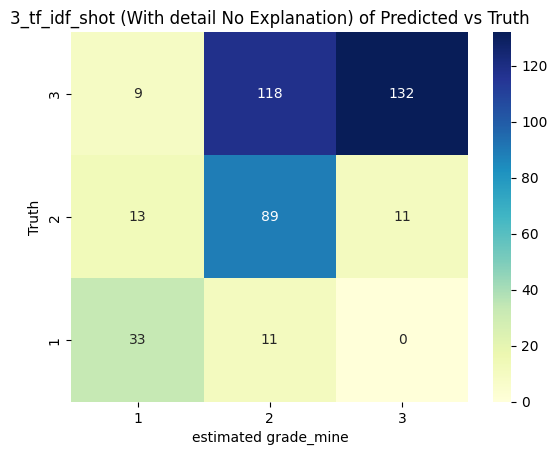

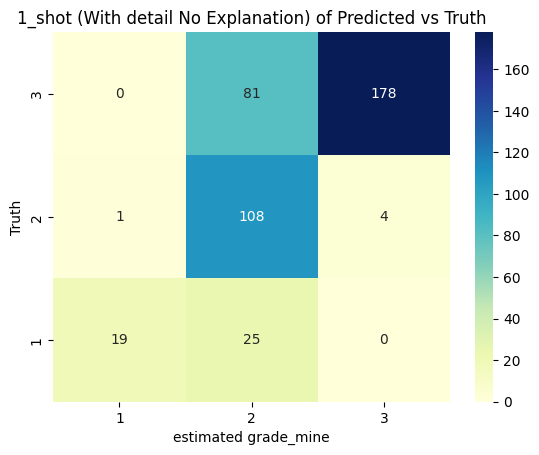

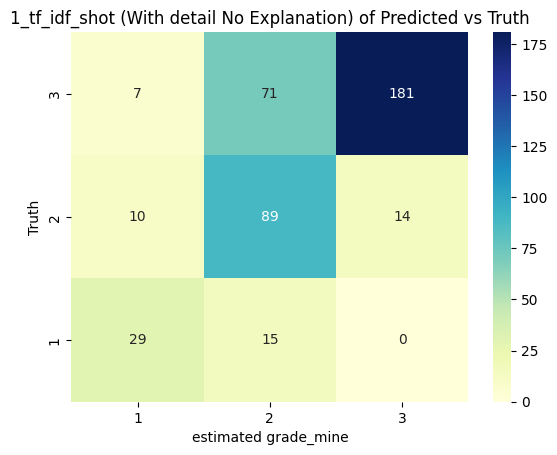

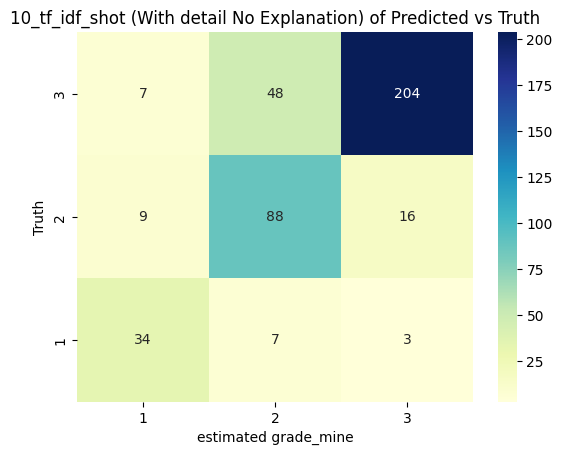

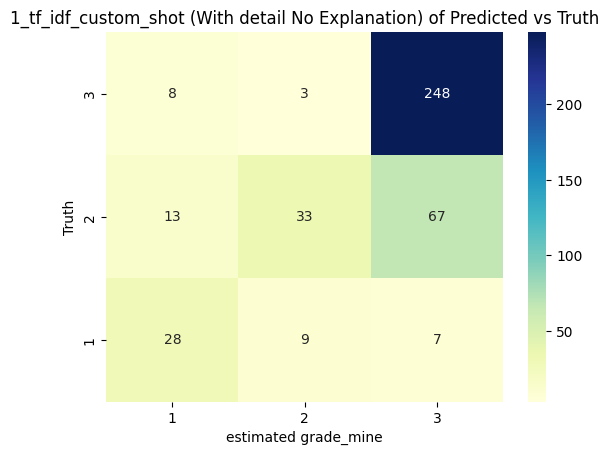

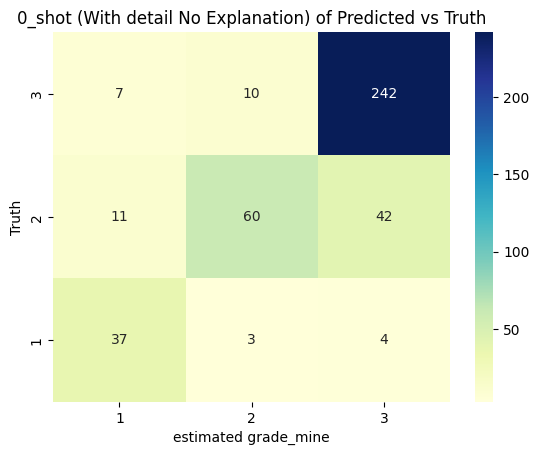

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
for file in file_list:
    df_mine = pd.read_csv(file)
    df_base = pd.read_csv('annotations-dpoc-medical_specialist_metrics.csv')
    # Align df_base and df_mine based on 'annotation id'
    shot = file.split('annotations-dpoc-llm_')[1].split('_metrics.csv')[0]
    aligned_df = pd.merge(df_base, df_mine, on='annotation id', suffixes=('_base', '_mine'))
    heatmap_data = aligned_df[['estimated grade_base', 'estimated grade_mine']].copy()
    # Create a pivot table for the heatmap
    heatmap_pivot = heatmap_data.pivot_table(index='estimated grade_base', columns='estimated grade_mine', aggfunc=len, fill_value=0)

    # Plot the heatmap
    sns.heatmap(heatmap_pivot, annot=True, fmt="d", cmap="YlGnBu")
    plt.gca().invert_yaxis()
    plt.ylabel('Truth')
    plt.title(f'{shot} (With detail No Explanation) of Predicted vs Truth')
    plt.show()